In [72]:
import numpy as np 
import pandas as pd

In [73]:
df = pd.read_excel('./data/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,...,3774.0,4331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         197 non-null    object 
 1   Coverage     197 non-null    object 
 2   OdName       197 non-null    object 
 3   AREA         197 non-null    float64
 4   AreaName     197 non-null    object 
 5   REG          197 non-null    float64
 6   RegName      197 non-null    object 
 7   DEV          197 non-null    float64
 8   DevName      197 non-null    object 
 9   1980         197 non-null    float64
 10  1981         197 non-null    float64
 11  1982         197 non-null    float64
 12  1983         197 non-null    float64
 13  1984         197 non-null    float64
 14  1985         197 non-null    float64
 15  1986         197 non-null    float64
 16  1987         197 non-null    float64
 17  1988         197 non-null    float64
 18  1989         197 non-null    float64
 19  1990  

In [75]:
df.shape

(1013, 51)

In [76]:
# Covert all Column Names to Str
df.columns = df.columns.astype(str)
# Drop all the Unnamed Columns... 
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns

Index(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object')

In [77]:
# Rename Columns 
df.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)
df.columns

Index(['Type', 'Coverage', 'Country', 'AREA', 'Continent', 'REG', 'Region',
       'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object')

In [78]:
# Set Country to be Index
df.set_index('Country', inplace=True)
df.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,39.0,...,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
Albania,Immigrants,Foreigners,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,0.0,...,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0
Algeria,Immigrants,Foreigners,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,67.0,...,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0
American Samoa,Immigrants,Foreigners,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,Immigrants,Foreigners,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [79]:
df.dropna(inplace=True)
df.shape

(197, 42)

In [80]:
# Add Total Column
df['Total'] = df.sum(axis=1)
df.head(3)

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,39.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,65977.0
Albania,Immigrants,Foreigners,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,0.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,18433.0
Algeria,Immigrants,Foreigners,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,67.0,...,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,72156.0


In [81]:
# Drop Area, Reg, Type, Coverage and Dev
df.drop(['AREA','REG','Type','Coverage','DEV'], axis=1, inplace=True)
df.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,65977.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,18433.0
Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,...,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,72156.0


In [82]:
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.00000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02
mean,1453.167513,1306.000000,1230.203046,905.431472,896.162437,856.304569,1008.639594,1543.908629,1640.456853,1944.670051,...,2662.35533,2554.720812,2403.583756,2510.091371,2560.101523,2849.614213,2525.360406,2618.304569,2629.654822,7.335943e+04
std,10784.524807,9449.373841,8864.905615,6503.149859,6452.570413,6155.858422,7205.630681,11045.558746,11809.252241,13939.908653,...,19104.65330,18261.461660,17129.490442,17908.071420,18276.881231,20386.174875,18082.496369,18763.159434,18838.224387,5.004571e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.719000e+03
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,29.00000,26.000000,32.000000,32.000000,37.000000,42.000000,38.000000,43.000000,45.000000,3.735000e+03
50%,14.000000,10.000000,12.000000,12.000000,14.000000,17.000000,21.000000,33.000000,36.000000,45.000000,...,211.00000,230.000000,198.000000,205.000000,217.000000,216.000000,196.000000,235.000000,217.000000,9.271000e+03
75%,266.000000,299.000000,299.000000,197.000000,207.000000,202.000000,257.000000,467.000000,476.000000,538.000000,...,857.00000,856.000000,975.000000,975.000000,917.000000,953.000000,851.000000,799.000000,852.000000,2.604200e+04
max,143137.000000,128641.000000,121175.000000,89185.000000,88272.000000,84346.000000,99351.000000,152075.000000,161585.000000,191550.000000,...,262242.00000,251640.000000,236753.000000,247244.000000,252170.000000,280687.000000,248748.000000,257903.000000,259021.000000,6.927209e+06


In [83]:
df['Continent'].value_counts()

Africa                             54
Asia                               49
Europe                             43
Latin America and the Caribbean    33
Oceania                            14
Northern America                    2
World                               2
Name: Continent, dtype: int64

In [84]:
df['Region'].value_counts()

Western Asia                 18
Eastern Africa               17
Western Africa               16
Southern Europe              14
Caribbean                    13
South America                12
South-Eastern Asia           10
Northern Europe              10
Eastern Europe               10
Middle Africa                 9
Southern Asia                 9
Western Europe                9
Central America               8
Eastern Asia                  7
Northern Africa               7
Central Asia                  5
Southern Africa               5
Polynesia                     4
Micronesia                    4
Melanesia                     4
Australia and New Zealand     2
Northern America              2
World                         2
Name: Region, dtype: int64

In [85]:
df['DevName'].value_counts()

Developing regions    147
Developed regions      48
World                   2
Name: DevName, dtype: int64

In [86]:
df[df['Continent'] == 'World']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Unknown,World,World,World,44000.0,18078.0,16904.0,13635.0,14855.0,14368.0,13303.0,...,4785.0,4583.0,4348.0,4197.0,3402.0,3731.0,2554.0,1681.0,1484.0,518056.0
Total,World,World,World,143137.0,128641.0,121175.0,89185.0,88272.0,84346.0,99351.0,...,262242.0,251640.0,236753.0,247244.0,252170.0,280687.0,248748.0,257903.0,259021.0,6927209.0


In [87]:
# Drop the Row of Country == 'Unknown' and 'Total'
df.drop(['Unknown', 'Total'], inplace=True)
df['Continent'].value_counts()

Africa                             54
Asia                               49
Europe                             43
Latin America and the Caribbean    33
Oceania                            14
Northern America                    2
Name: Continent, dtype: int64

In [88]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [89]:
# Plotting Data

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [90]:
# df.loc[['Total'], years].transpose().plot(figsize=(10,6))
# plt.title('Total Immigration to Canada From 1980 - 2013')
# plt.ylabel('Immigrants')
# plt.xlabel('Years')
# plt.show()

<AxesSubplot:>

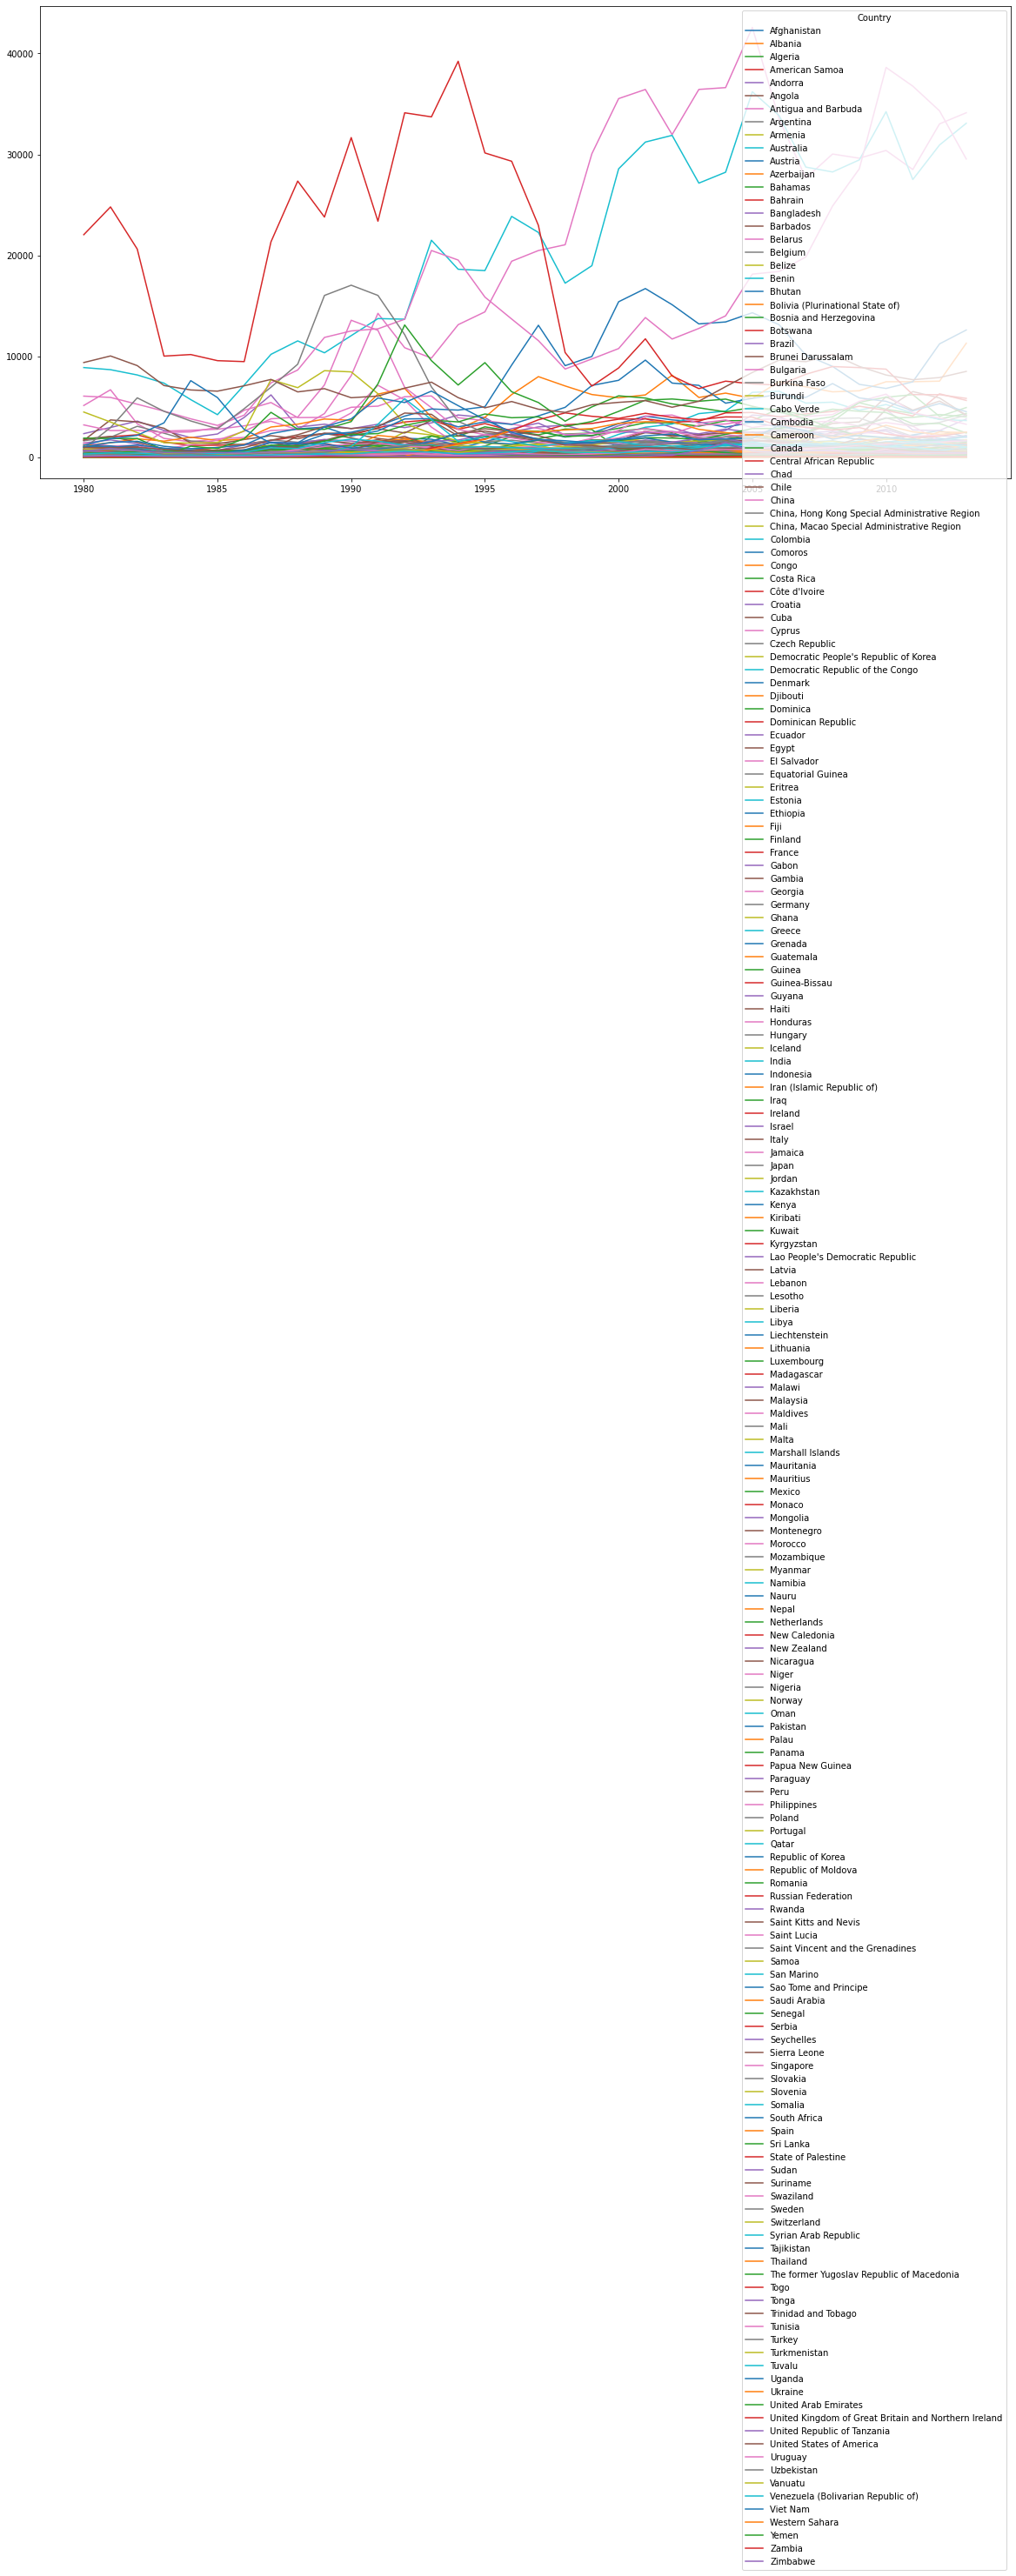

In [92]:
df.loc[:, years].transpose().plot(figsize=(20, 10))

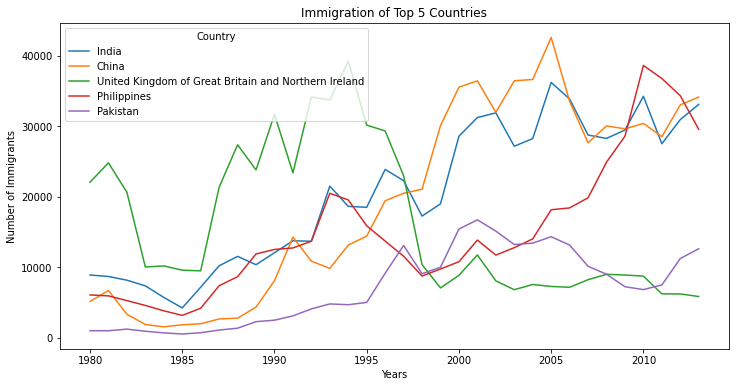

In [102]:
# Top Five Countries
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top_5 = df.head()
df_top_5[years].transpose().plot(figsize=(12, 6))
plt.title('Immigration of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

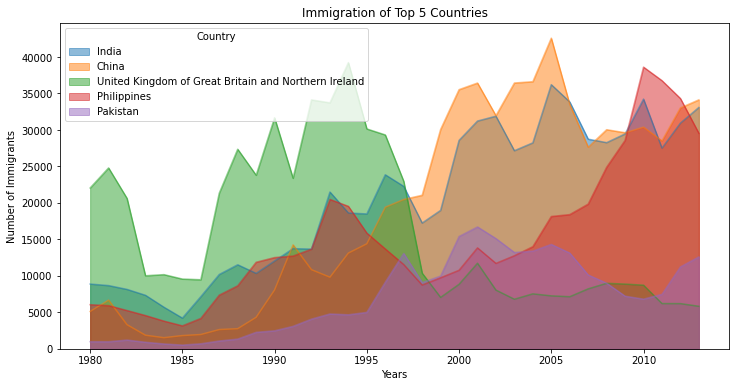

In [107]:
# Top Five as Area Chart
df_top_5[years].transpose().plot(kind='area', stacked=False, figsize=(12, 6))
plt.title('Immigration of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

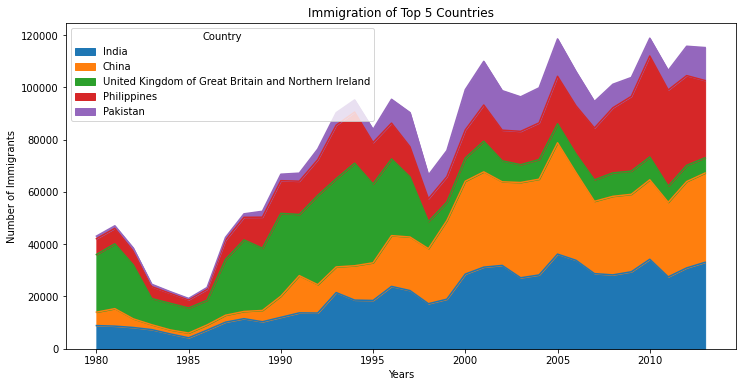

In [105]:
df_top_5[years].transpose().plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Immigration of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

<AxesSubplot:>

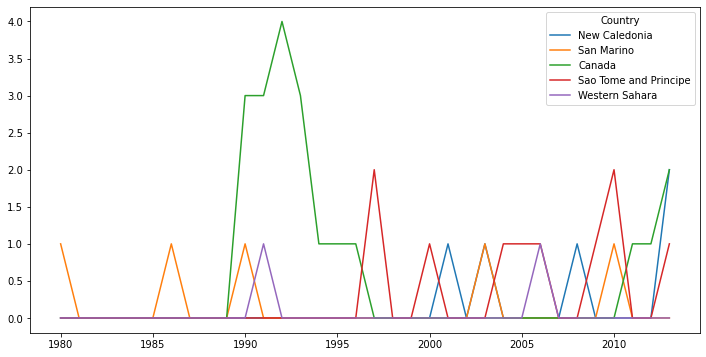

In [100]:
# Bottom Five Countries
df_bottom_five = df.tail()
df_bottom_five[years].transpose().plot(figsize=(12, 6))

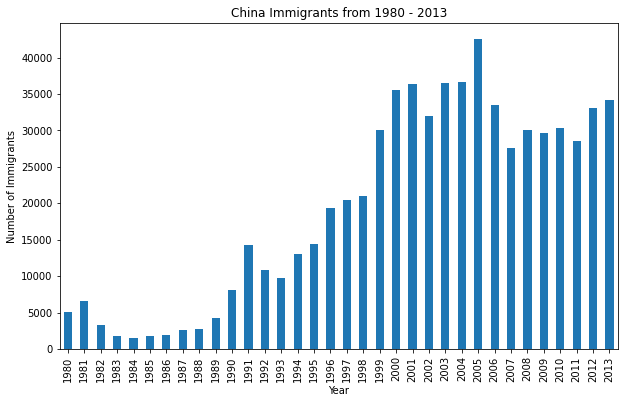

In [113]:
df.loc['China', years].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('China Immigrants from 1980 - 2013')
plt.show()

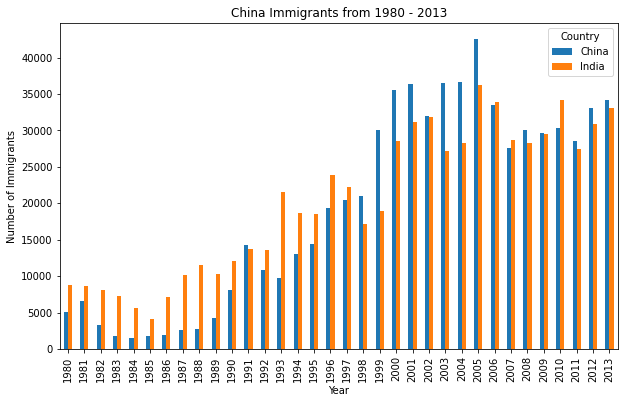

In [117]:
df.loc[['China', 'India'], years].transpose().plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('China Immigrants from 1980 - 2013')
plt.show()

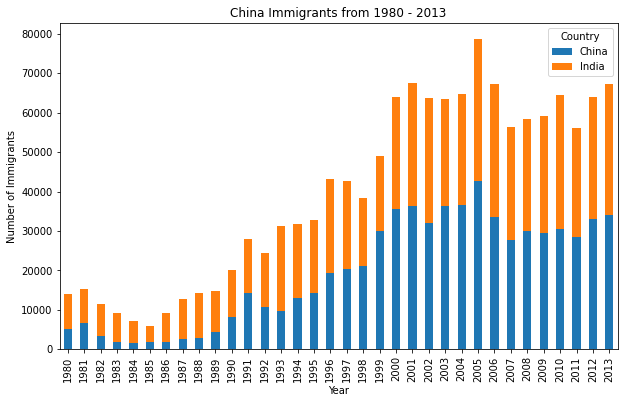

In [118]:
df.loc[['China', 'India'], years].transpose().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('China Immigrants from 1980 - 2013')
plt.show()

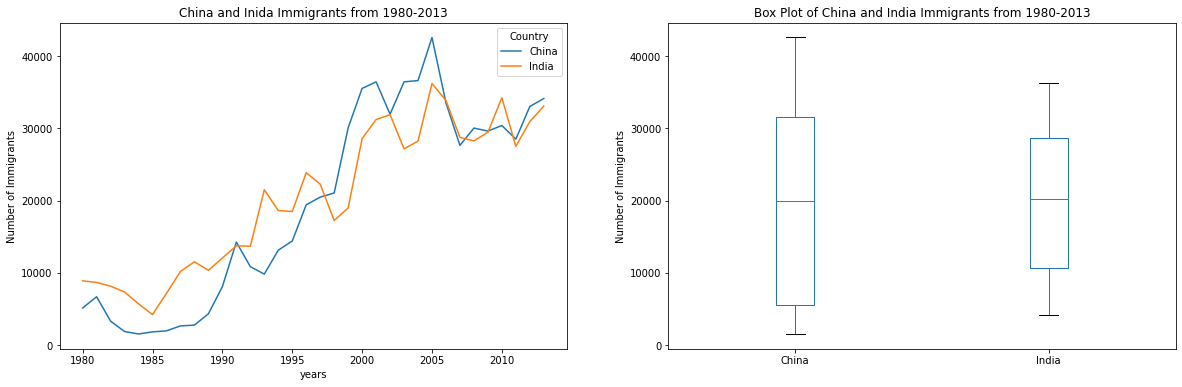

In [134]:
fig = plt.figure() 

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

df.loc[['China', 'India'], years].transpose().plot(figsize=(20, 6), ax=ax0)
ax0.set_title("China and Inida Immigrants from 1980-2013")
ax0.set_xlabel("years")
ax0.set_ylabel("Number of Immigrants")

df.loc[['China', 'India'], years].transpose().plot(kind='box', figsize=(20, 6), ax=ax1)
ax1.set_title("Box Plot of China and India Immigrants from 1980-2013")
ax1.set_ylabel("Number of Immigrants")

plt.show()

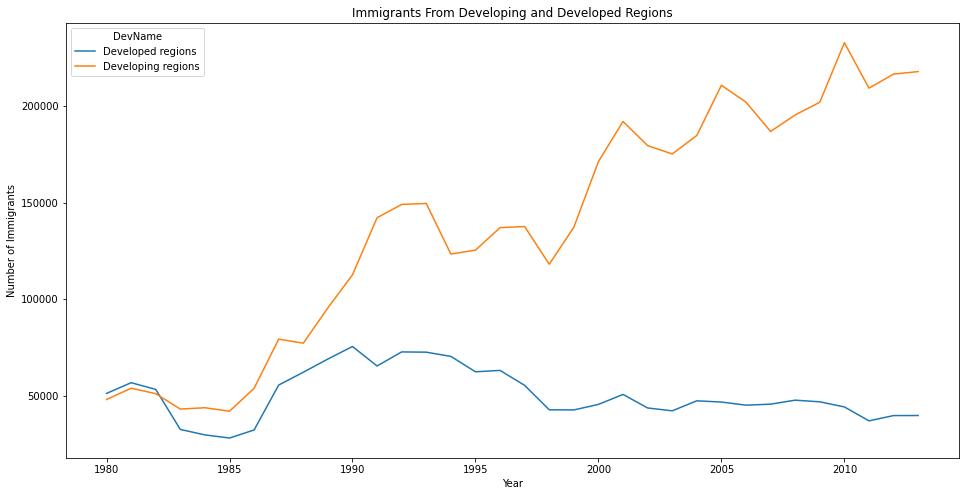

In [145]:
df.groupby('DevName').sum()[years].transpose().plot(figsize=(16,8))
plt.title('Immigrants From Developing and Developed Regions')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()


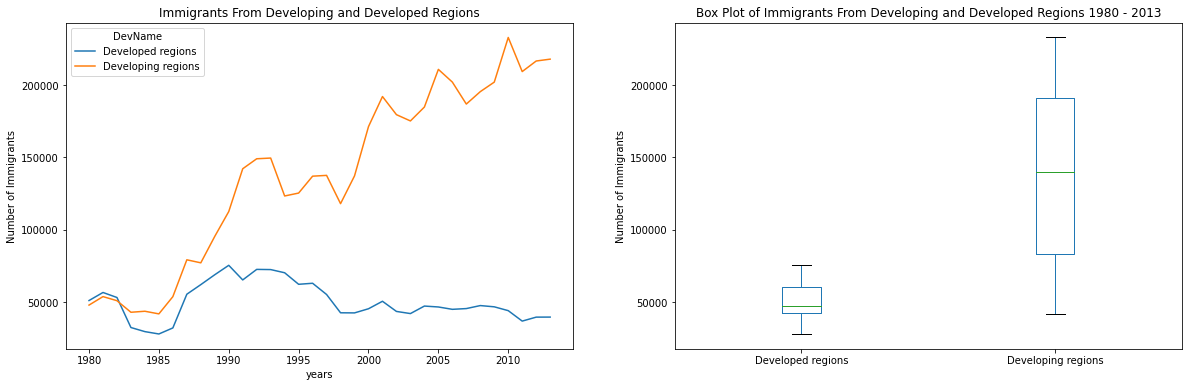

In [148]:
df_developed = df.groupby('DevName').sum()[years].transpose()
fig = plt.figure() 

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

df_developed.plot(figsize=(20, 6), ax=ax0)
ax0.set_title("Immigrants From Developing and Developed Regions")
ax0.set_xlabel("years")
ax0.set_ylabel("Number of Immigrants")

df_developed.plot(kind='box', figsize=(20, 6), ax=ax1)
ax1.set_title("Box Plot of Immigrants From Developing and Developed Regions 1980 - 2013")
ax1.set_ylabel("Number of Immigrants")

plt.show()